In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import seaborn as sns
import os

In [2]:
name = ['cheetah']
for animal in name:
    data_name = animal + '_val'
    path = 'C:/Users/procns/Desktop/3-2학년 과제/인공지능개론/animal/'+data_name
    file_list = os.listdir(path)
    #print(file_list)
    #파일 이름 변경
    str_name = animal
    str_prefix = '_'
    num = 0
    
    for old_name in file_list:
        index = old_name.find('.')
        name_front = old_name[:index]
        file_extension = old_name[index:]
        #print(f'name_front : {name_front}')
        #print(f'file_extension : {file_extension}')
        num += 1
        new_name = str_name + str_prefix + str(num) + file_extension
        #print(new_name)
        os.rename(path + '/'+old_name, path + '/' + new_name)

In [3]:
train_path ='C:/Users/procns/Desktop/3-2학년 과제/인공지능개론/animal/train'
test_path = 'C:/Users/procns/Desktop/3-2학년 과제/인공지능개론/animal/test'
val_path = 'C:/Users/procns/Desktop/3-2학년 과제/인공지능개론/animal/val'
train_label = [0] * 500 + [1]*500 + [2]*500
test_label = [0]*100 + [1]*100 + [2]* 100
val_label = [0] * 100 + [1]* 100 + [2] * 100

In [22]:
for dirname, _, filenames in os.walk(train_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/procns/Desktop/3-2학년 과제/인공지능개론/animal/train\cheetah\cheetah_1.jpg
C:/Users/procns/Desktop/3-2학년 과제/인공지능개론/animal/train\cheetah\cheetah_10.jpg
C:/Users/procns/Desktop/3-2학년 과제/인공지능개론/animal/train\cheetah\cheetah_100.jpg
C:/Users/procns/Desktop/3-2학년 과제/인공지능개론/animal/train\cheetah\cheetah_101.jpg
C:/Users/procns/Desktop/3-2학년 과제/인공지능개론/animal/train\cheetah\cheetah_102.jpg
C:/Users/procns/Desktop/3-2학년 과제/인공지능개론/animal/train\cheetah\cheetah_103.jpg
C:/Users/procns/Desktop/3-2학년 과제/인공지능개론/animal/train\cheetah\cheetah_104.jpg
C:/Users/procns/Desktop/3-2학년 과제/인공지능개론/animal/train\cheetah\cheetah_105.jpg
C:/Users/procns/Desktop/3-2학년 과제/인공지능개론/animal/train\cheetah\cheetah_106.jpg
C:/Users/procns/Desktop/3-2학년 과제/인공지능개론/animal/train\cheetah\cheetah_107.jpg
C:/Users/procns/Desktop/3-2학년 과제/인공지능개론/animal/train\cheetah\cheetah_108.jpg
C:/Users/procns/Desktop/3-2학년 과제/인공지능개론/animal/train\cheetah\cheetah_109.jpg
C:/Users/procns/Desktop/3-2학년 과제/인공지능개론/animal/train\cheetah\cheetah_11.jpg
C:/

In [4]:
train_img_paths = sorted(
    [os.path.join(train_path, fname)
    for fname in os.listdir(train_path)
    if fname.endswith('.jpg')])
test_img_paths = sorted(
    [os.path.join(test_path, fname)
    for fname in os.listdir(test_path)
    if fname.endswith('.jpg')])
val_img_paths = sorted(
    [os.path.join(val_path, fname)
    for fname in os.listdir(val_path)
    if fname.endswith('.jpg')])

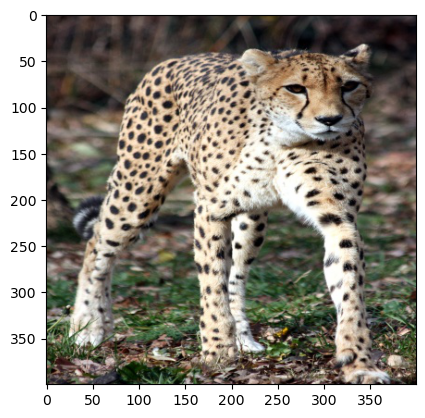

In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
plt.axis('on')
plt.imshow(load_img(train_img_paths[1]))

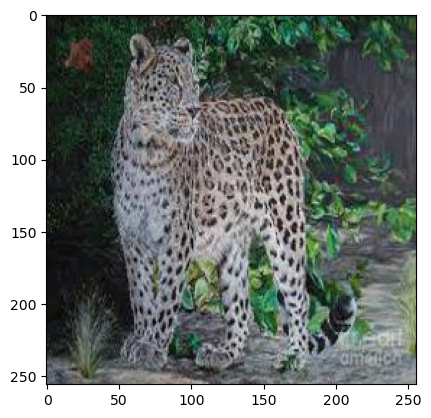

In [6]:
plt.axis('on')
plt.imshow(load_img(test_img_paths[204]))

In [21]:
plt.figure(figsize=(10, 10))
for images,_ in train_img_paths.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.axis("off")

AttributeError: 'list' object has no attribute 'take'

<Figure size 1000x1000 with 0 Axes>

In [20]:
len(train_img_paths)

1500

In [8]:
img_size = (200,200)
train_num = len(train_img_paths)
test_num = len(test_img_paths)
val_num = len(val_img_paths)

def path_to_input_image(path):
    return img_to_array(load_img(path, target_size = img_size))

train_input = np.zeros((train_num,) + img_size + (3,), dtype='float32')
test_input = np.zeros((test_num,) + img_size + (3,), dtype='float32')
val_input = np.zeros((val_num,) + img_size + (3,), dtype='float32') 
for i in range(train_num):
    train_input[i] = path_to_input_image(train_img_paths[i])
for i in range(test_num):
    test_input[i] = path_to_input_image(test_img_paths[i])
for i in range(val_num):
    val_input[i] = path_to_input_image(val_img_paths[i])

In [9]:
train_input.shape, test_input.shape, val_input.shape

((1500, 200, 200, 3), (300, 200, 200, 3), (300, 200, 200, 3))

In [10]:
from tensorflow.keras.utils import to_categorical

train_label = to_categorical(train_label)
test_label = to_categorical(test_label)
val_label = to_categorical(val_label)

In [11]:
train_label.shape, test_label.shape, val_label.shape

((1500, 3), (300, 3), (300, 3))

In [12]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip('horizontal'),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

# rescaling 층 사용
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape = (200, 200, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, kernel_size = 3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(64, kernel_size = 3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(128, kernel_size = 3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Conv2D(128, kernel_size = 3, activation='relu')(x)
x = layers.MaxPooling2D(pool_size = 2)(x)
x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.4)(x)

outputs = layers.Dense(3, activation = 'softmax')(x)
model = keras.Model(inputs = inputs, outputs = outputs)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 200, 200, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                             

In [15]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [16]:
callbacks = [
    keras.callbacks.ModelCheckpoint('cheetah_jaguar_leopard.keras',
                                   save_best_only = True)
]
history = model.fit(
    train_input,train_label,
    epochs = 30,
    callbacks = callbacks,
    batch_size = 32,
    validation_data = (val_input,val_label))

Epoch 1/30
47/47 [==============================] - 64s 1s/step - loss: 1.1114 - accuracy: 0.3467 - val_loss: 1.1200 - val_accuracy: 0.4567
Epoch 2/30
47/47 [==============================] - 60s 1s/step - loss: 1.0642 - accuracy: 0.4273 - val_loss: 1.1691 - val_accuracy: 0.3633
Epoch 3/30
47/47 [==============================] - 61s 1s/step - loss: 0.9977 - accuracy: 0.5120 - val_loss: 1.0659 - val_accuracy: 0.4867
Epoch 4/30
47/47 [==============================] - 63s 1s/step - loss: 0.9215 - accuracy: 0.5733 - val_loss: 1.5350 - val_accuracy: 0.3833
Epoch 5/30
47/47 [==============================] - 65s 1s/step - loss: 0.9139 - accuracy: 0.5807 - val_loss: 0.8964 - val_accuracy: 0.5400
Epoch 6/30
47/47 [==============================] - 62s 1s/step - loss: 0.8453 - accuracy: 0.6107 - val_loss: 0.9428 - val_accuracy: 0.5300
Epoch 7/30
47/47 [==============================] - 62s 1s/step - loss: 0.8362 - accuracy: 0.6300 - val_loss: 0.8384 - val_accuracy: 0.6167
Epoch 8/30
47/47 [==

NameError: name 'keras' is not defined